In [96]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Introduction to computational Fourier analysis for engineers
Most of mechanical engineers get a good introduction to vibration analysis, and sooner or later FFT is presented as a tool for detecting natural frequencies of vibrating systems. However, the theory behind the FFT is not touched even with a long stick. This notebook will take you from the low level theory and main concepts of the Fourier transform by forgetting the FFT completely and talking about the real deals, which are the Fourier transform, Fourier series and the discrete fourier transform.

## Fourier transform
### Basics
The Fourier transform is defined as

\begin{equation}
\hat{f}(\xi) = \int_{-\infty}^{\infty}f(x)e^{-2\pi j x \xi}dx
\end{equation}
> where,<br/>
> $f(x)$ is any integrable function of $x$, for time series x = t<br/>
> If x is time then $\xi$ is frequency <br/>
> $j$ is the imaginary unit<br/>
> The hat in $\hat{f}(\xi)$ is used to denote the Fourier transformed function

Intuitively, the integral results in higher values when the signal $f(x)$ contains a frequency component $\xi$, we will have a closer look at this later. The reason for not including time in the definition by default is that the Fourier transform has applications outside of the time series analysis, which is only a special case of the fourier transform.

When the function $f(x)$ is integrable and real valued, the Fourier transform can be reversed without information loss via the inverse Fourier transform

\begin{equation}
f(x) = \int_{-\infty}^{\infty}\hat{f}(\xi)e^{2\pi j x \xi}d\xi
\end{equation}

For the algorithm implementation, it is important for now to understand that the exponential function can be split to sine and cosine components according to the Euler's formula as

\begin{equation}
e^{jx} = \cos(x) + j\ \sin(x)
\end{equation}

Applying this to the Fourier transform gives

\begin{equation}
\hat{f}(\xi) = \int_{-\infty}^{\infty}f(x)(\cos(2\pi\xi x) + j\ \sin(2\pi\xi x))dx
\end{equation}

This results in two integrals

\begin{equation}
\hat{f}(\xi) = \int_{-\infty}^{\infty}f(x)\cos(2\pi\xi x)dx + j \int_{-\infty}^{\infty}f(x)\ \sin(2\pi\xi x))dx
\end{equation}

where the real and imaginary parts give the magnitude and phase of the Fourier transformed function $\hat{f}(\xi)$ respectively.

### Visual interpretation

A nice visualisation of the fourier transform can be watched on youtube and is linked below. For the video, remember that for time-series

> x = t<br/>
> $\xi$ = $f$ (frequency)<br/>
> $\hat{f}(x)$ can also be denoted as $F(x)$<br/>
> $2\pi f$ = $\omega$<br/>

which give the little bit nicer form of the transform

\begin{equation}
\hat{F}(\omega) = \int_{-\infty}^{\infty}f(t)\cos(\omega t)dt + j\  \int_{-\infty}^{\infty}f(x)\sin(\omega t)dt
\end{equation}

[![Visualisation of the fourier integral video preview](https://img.youtube.com/vi/3gjJDuCAEQQ/0.jpg)](https://www.youtube.com/watch?v=3gjJDuCAEQQ)

### Test questions
* Question 1: Evaluate the fourier transform $\hat{f}(sin(2\pi \xi_0 x))(\xi)$<br/>
(solution: https://mathworld.wolfram.com/FourierTransformSine.html)
* Question 2: Use the inverse transform to get back to the original function
* Question 3: Investigate what are the meanings of the phase and magnitude of the transformed signal in the physical case of mechanical vibration




## The Fourier series
In my experience as a student, the Fourier transform is often confused with the Fourier series, even in some online guides! The fourier series is a closely related quantity, which is used to compose signals or solutions to differential equations as a series of sine and cosine functions. This should never be confused with the Fourier transform.

We will not go far beyond the definition of fourier series, but nevertheless it is

\begin{equation}
S_n f(t) = \sum_{i=-n}^{n}{\hat{f}(i)e^{jit}} \rightarrow f(t) \ as \ n \rightarrow \infty
\end{equation}
, where
\begin{equation}
    \hat{f}(i) = \frac{1}{2\pi}\int_{-\pi}^{\pi}f(t)e^{-jit}dt, i = 1, 2, ..
\end{equation}

You quessed it, $\hat{f}(i)$ is the Fourier transform of the integral on the closed boundary interval, which is actually arbitrary, $[-\pi, \pi]$ in this case. The physical interpretation of the fourier series is that any real function can be defined on a bounded interval can be represented as a series of summed sines and cosines, this is somewhat analogous to the Taylor series which is often more familiar topic for engineers.

After the application of the Euler's formula to the integral, the sine part is referred to as the Fourier sine series and the cosine part is the Fourier cosine series. The convergence of the Fourier series is a also a quite complicated topic and we will not go there.

A really nice video on the Fourier series is here

[![Visualisation of the fourier series video preview](https://img.youtube.com/vi/r6sGWTCMz2k/0.jpg)](https://www.youtube.com/watch?v=r6sGWTCMz2k)

The moral of the story here is that you should never confuse the Fourier series with the Fourier transform.

In [105]:
def S_n(d):
    return d

### Test questions
* Question 1: What is the physical interpretation of the fourier series?

## Discrete Fourier Transform

In computer world, we deal with discrete properties. Thus we need a discrete version of the integral that only really exists in continuous world. The discrete Fourier transform is defined as

\begin{equation}
X_k = \sum^{N-1}_{n=0}{x_n\cdot e^{-j\frac{2\pi}{N}kn}}
\end{equation}

Similarly to the continuous version, we can apply the Euler's formula as

\begin{equation}
X_k = \sum^{N-1}_{n=0}{x_n\cdot (\cos{\frac{2\pi}{N}kn} - j\ \sin{\frac{2\pi}{N}kn}})
\end{equation}

> where,<br/>
> $X_k$ is the transformed point<br/>
> $N$ is the number of points in the discrete data set<br/>
> $j$ is the imaginary unit<br/>
> $k = 0,1,.., N-1$ is the index of the sample

Comparing the sum of the DFT to the integral in the Fourier transform, we can see that it simply uses a simple numeric estimation of the continuous version of the integral, where the value x_n is an impulse having the area equals to its value.

### Numerical integration
Let's forget the Fourier stuff for a second and dive to the discrete integration. The "impulse" means here that we treat each data point in the discrete signal as a rectangle, and we sum all the rectangles together.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Integration_rectangle.svg/1024px-Integration_rectangle.svg.png" alt="drawing" width="400"/>
The area under the curve is approximated as the sum of these rectangles. The width of each rectangle is the distance between the two samples $T$.

Let's consider a simple function $f(x) = x^2$ as an example. Imagine we know the value of the function $x_n$ for $N$ points with equal distance on the x-axis, the integral can be then estimated as

\begin{equation}
\int^2_0 x^2 dx = \sum_{n=0}^{N-1}f_n(x)\Delta x = 8/3, \ N \rightarrow \infty
\end{equation}



Let's use python to sanity check the convergence of this integration method

Text(0.5, 1.0, 'Convergence of the numerical integral')

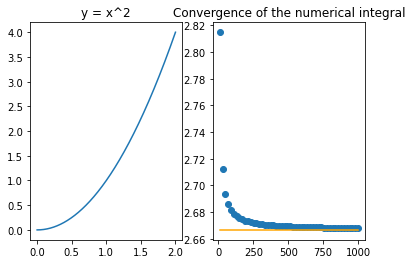

In [97]:
def continuous_f(x):
    return x**2

## Now let's investigate the convergence of the discrete integration
N = np.linspace(10, 1000)

areas = np.zeros(50)
for i, n_samples in enumerate(N):
    x_range = np.linspace(0, 2, int(n_samples))
    signal = continuous_f(x_range)
    
    T = (x_range[-1] - x_range[0])/len(x_range) # The length of one sample
    area = sum(signal)*T
    
    areas[i] = area

## Plot the results
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x_range, signal)
ax1.set_title('y = x^2')
ax2.scatter(N, areas)
ax2.plot(N, np.ones(50)*8/3, c='orange')
ax2.set_title('Convergence of the numerical integral')


The area converges to the exact value. In case of time series signals, $\Delta x = T$ is the sampling frequency. 

### Harmonic serie trick for derivation of DFT
Going back to the definition of the DFT, we see that the equation does not contain the sampling time $\Delta x$ or $T$. This is because the DFT considers the signal to be periodic, and the evaluation happens at the harmonics of the fundamental frequency, which is the period of the entire signal

\begin{equation}
T_0 = \frac{1}{NT}
\end{equation}

If this trick was not used, the Fourier transform could simply be expressed the sum of the impulses of a function at each discrete point as

\begin{equation}
\hat{f}(\xi) = \sum_{n=0}^{N-1}f_n(x)\cdot e^{-j\xi n T}
\end{equation}
, so basically this is the original Fourier transform with the substitutions

> $x = \Delta x = T$  Sampling frequency <br/>
> $f(x) = f_n(x) = x_n$ Discrete impulses <br/>
> The $2\pi$ can be added talking about Hz instead of radians

These are exactly the same substitutions we used previously in the easy numeric integration example!

Now the harder part: The harmonic series of the fundamental frequency can be defined as
\begin{equation}
\xi = 0, \frac{1}{NT}, \frac{1}{NT}\cdot 2, .., \frac{1}{NT}\cdot k, \frac{1}{NT}\cdot (N-1) = \sum_{n=0}^{N-1}\frac{n}{NT}
\end{equation}
The intuition of the first term $\xi = 0$ is that it is the average of the signal. The discretization of the transform follows directly from here because we have the discrete function evaluated at exactly k harmonics, with the values equal to

\begin{equation}
X_k = \sum^{N-1}_{n=0}{x_n\cdot e^{-j\frac{1}{N}kn}},\ k = 0, 1, .., (N-1)
\end{equation}
(This is version yields rad/s, to get Hz just multiply the exponential with $2\pi$)

And this was actually the derivation of the DFT. The assumptions needed for the trick were:
> The signal is periodic<br/>
> The sample interval is constant<br/>
> Only N data points (bins) matter for signal of length N <br/>

### Frequency scale of the DFT
Now we understand how the DFT works so we can easily work out the frequency scale of the DFT output. What we basically do in the DFT, is that we compare the signal at each point to the harmonic $\frac{k}{NT}$. Intuitively, this means that the frequency resolution, or the with of each "bin" of the transformed signal is simply 

\begin{equation}
\frac{1}{NT}
\end{equation}

, where
> $N$ is the number of samples <br/>
> $\frac{1}{T}$ is the sampling frequency <br/>

From this directly follows that the frequency range of the DFT is $\frac{1}{T}$, or the sampling frequency $f_{sample}$.

### Naive implementation of the DFT

Let's make a naive $O(n^2)$ implementation of the DFT for some more hands-on exprience. The implementation of the naive version is extremely simple. Please note that this is the Hz version.

In [98]:
def naiveFFT(x):
    # Add require stuff
    
    N = x.size
    X = np.ones(N)*(0+0j)
    
    for k in range(N):
        A = np.ones(N)*(0+0j)
        for n in range(N):
            A[n] = x[n]*np.exp(-np.complex(0, 2*np.pi*k*n/N))
        X[k] = sum(A)
    
    return X

That's right, implementing the DFT is not hard at all. Let's test it out with a signal containing a 4 Hz sinusoid and a 1.5 Hz sinusoid.

sampling_frequency: 10.0


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

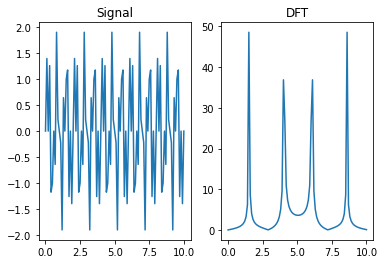

In [100]:
def f_sin(t):
    return np.sin(4*t*2*np.pi) + np.sin(1.5*t*2*np.pi)
# Create a time-series signal
N = 101
t = np.linspace(0, 10, N)
T = t[1]-t[0]
signal = f_sin(t)
fft = naiveFFT(signal)
freq_scale = np.linspace(0,1/T, N)

print("sampling_frequency: " + str(1/T))

# Plot the results
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(t, signal)
ax1.set_title('Signal')
ax2.plot(freq_scale, np.absolute(fft))
ax2.set_title('DFT')
plt.plot

But wait, the DFT is mirrored w.r.t to 5 Hz? This is called spectral folding, it is a result from the complex conjugate of the real-valued input signal. OK, so for real valued signals the transform is mirrored after $0.5 \cdot f_{sample}$. Moreover, any frequency higher than the Nyquist frequency, $(0.5 \cdot f_{sample})$ is not detectable by DFT, and causes aliasing.

So as the frequencies above the Nyquist frequency are not interesting, we can instantly drop half of the computation from the DFT by only evaluating to $k = N/2$ with the naive approach, and still effectively get the same result.

### Naive implementation of the inverse DFT

In [102]:
def naive_IDFT(X):
    ##
    # code here
    ##
    return x

### Test questions
* Question 1: What is aliasing?
* Question 2: The peaks in the DFT plot are not straight up, as they theoretically should be for the sinusoids, what is this phenomenon caused by the sampling called?
* Question 3: Look a little bit into what windowing means in the context of the DFT, and what it does to the phenomenon of question 2.
* Question 4: Implement the computation requirement halving suggestion from the text to the naive DFT.
* Question 5: Implement the naive inverse DFT above.


## The Fast Fourier Transform
The fast fourier transform is an algorithm developed in the sixties by the mathematicians Cooley and Tuckey. The FFT algorithm reduces the time-complexity of the DFT to $O(n \log n)$ by using some mathematical tricks to reduce the amount of computation work required. I plan to make a separate notebook about the implementation of the FFT because this post would be too long.